<a href="https://colab.research.google.com/github/Angepira/AngePira.github.io/blob/main/Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Supervisado: Clasificación

**Regresión logística:**

Cuando a partir de un conjunto de datos
de entrada buscamos clasificar en
posibles estados (SI/NO) o con un número
finito de “etiquetas” o “clases”

**Objetivo:**

Se busca clasificar, con el dataset
proporcionado, si el usuario que visita un sitio
web usa como sistema operativo, Windows,
Macintosh (OSX) o Linux.
Las etiquetas tendrán asignados valores de la siguiente manera:

0 - Windows

1 - Macintosh

2 - Linux

## Importamos librerías

In [ ]:
#Importamos librerías
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
plt.rcParams['figure.figsize'] = (10,9)
plt.style.use('ggplot')

## Exploración inicial

In [ ]:
#Cargamos el archivo desde link
#El archivo se llama "usuarios_win_mac_lin.csv"
url = "https://drive.google.com/file/d/1V6BNBYqNxiYn-DNNJK_AqRkeC6oFAppD/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [ ]:
#Leemos el dataset
df = pd.read_csv(path)
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [ ]:
#Revisamos la info del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [ ]:
#Mirmos las estadísticas de las variables numéricas
df.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [ ]:
#Miramos cuantos valores hay de cada clase
df['clase'].value_counts()

0    86
2    44
1    40
Name: clase, dtype: int64

<ipython-input-7-7048fd8e8647>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['clase'],1).hist()


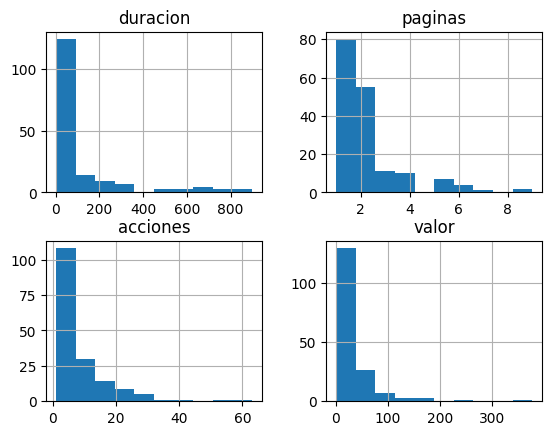

In [ ]:
#Visualizamos los datos excluyendo nuestro target
df.drop(['clase'],1).hist()
plt.show()

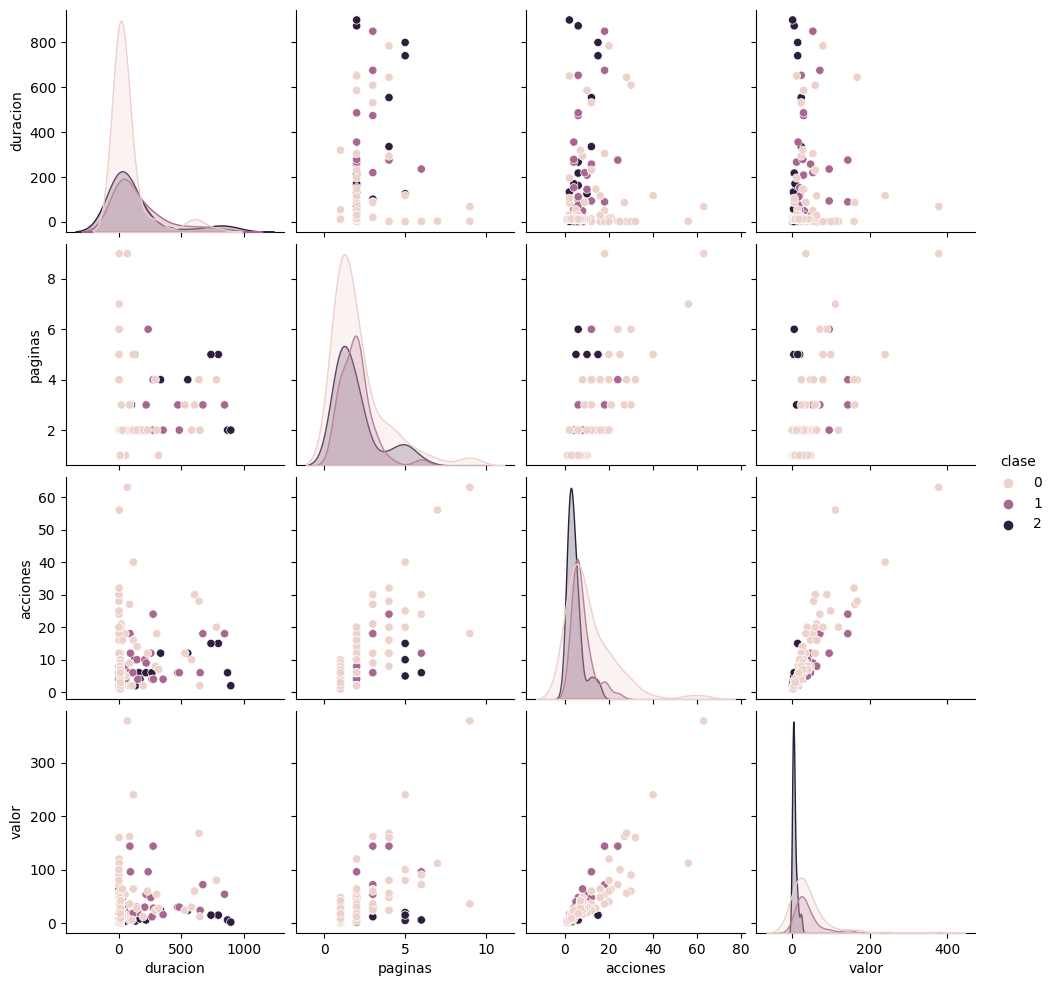

In [ ]:
sns.pairplot(df,hue='clase')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


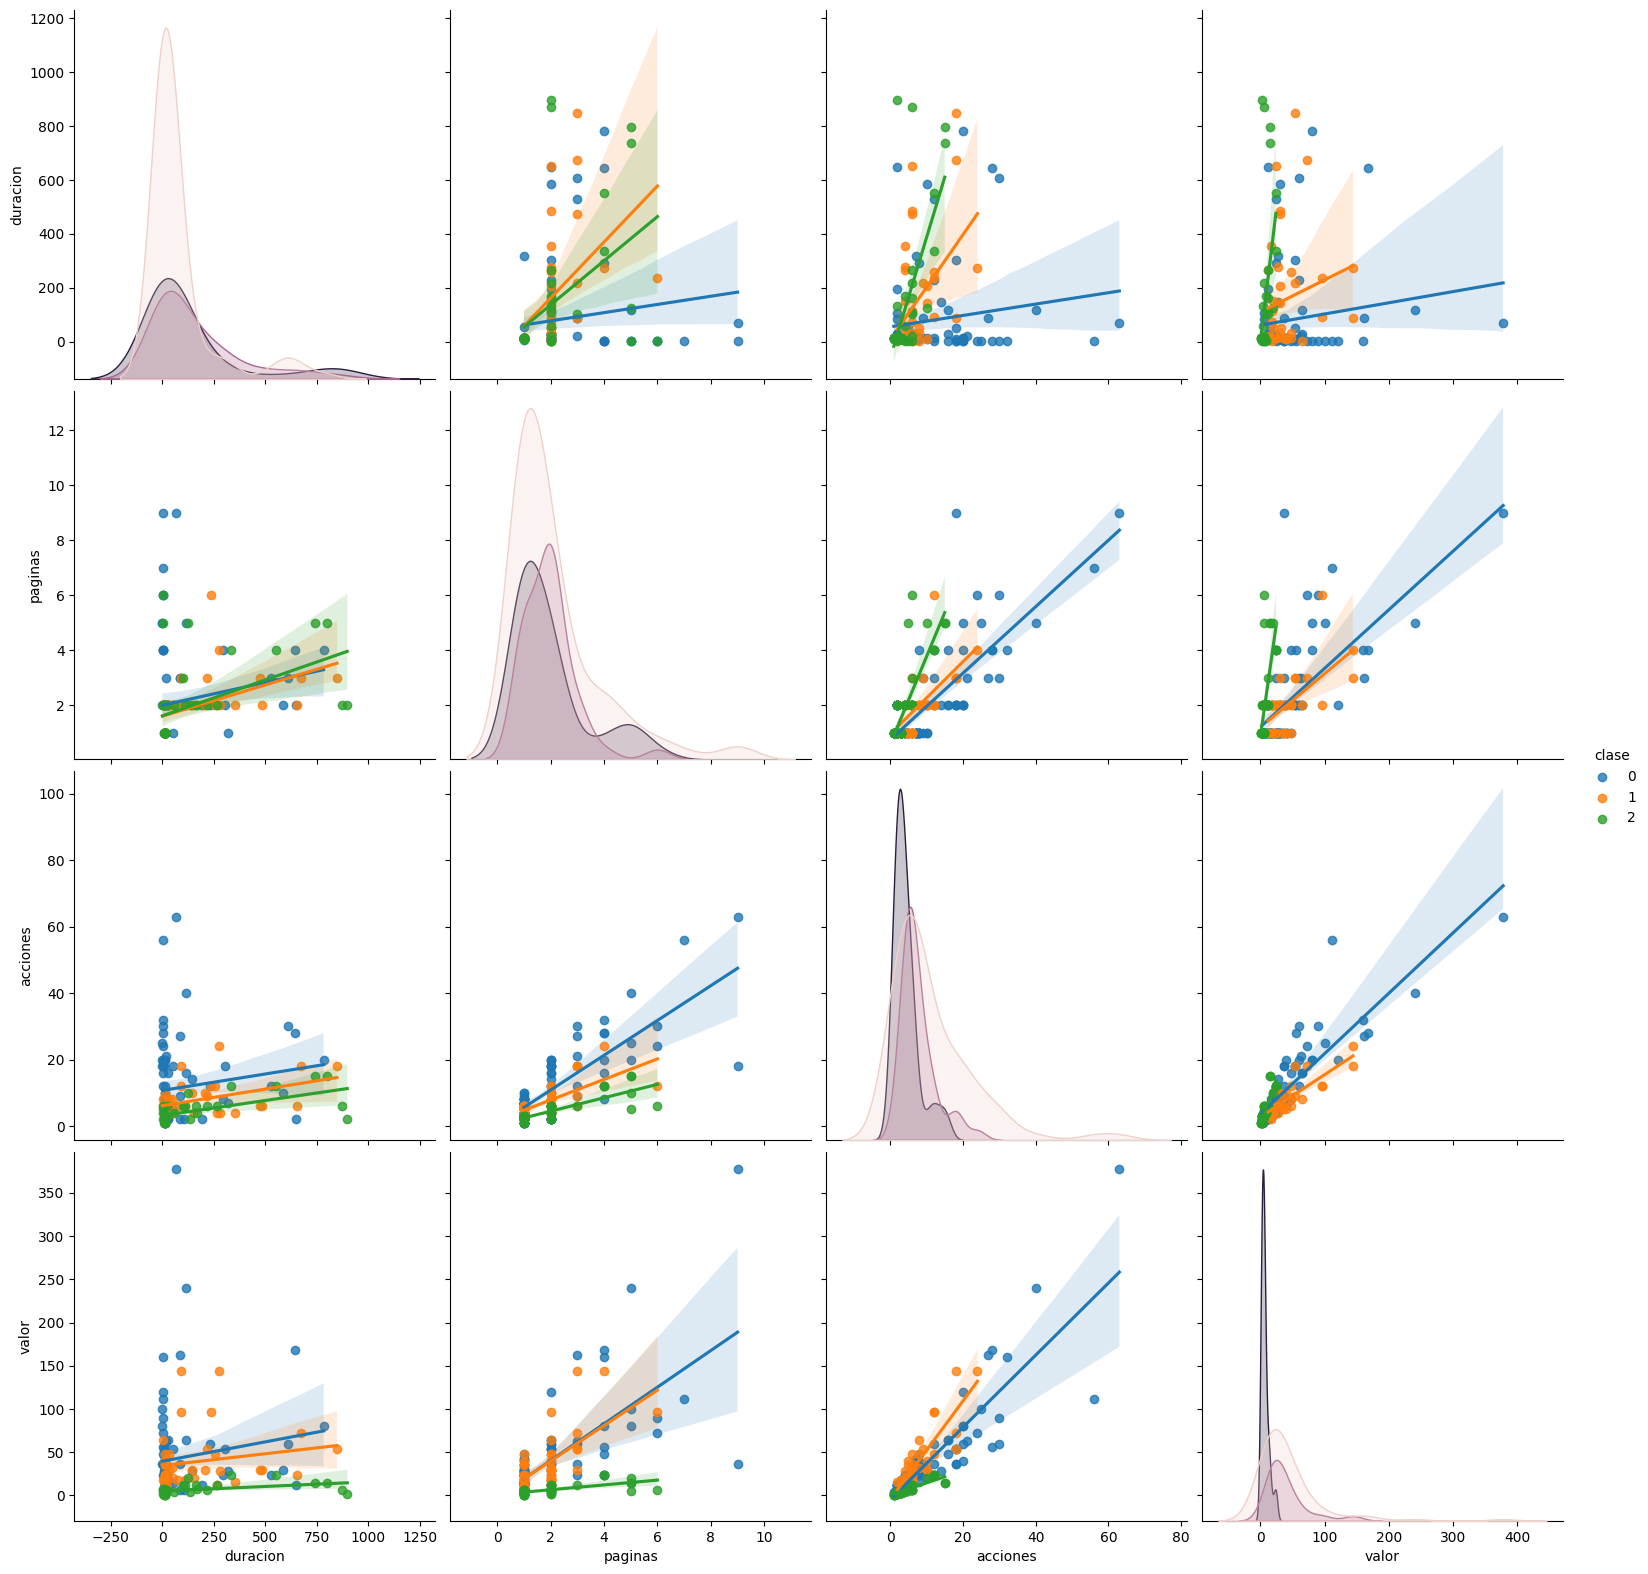

In [ ]:
sns.pairplot(df.dropna(),hue='clase',size=4,vars=['duracion', 'paginas', 'acciones', 'valor'], kind='reg')

## Preparemos los datos para el modelo

In [ ]:
#Creamos la matriz de features
X = df.drop(columns=['clase'])

#Creamos el vector de target
y = df[['clase']]

In [ ]:
#Separamos los conjuntos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=33)

## Creemos el modelo

In [ ]:
#Instanciamos el modelo
model = linear_model.LogisticRegression()

In [ ]:
#Entrenamos el modelo
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Hacemos la predicción

In [ ]:
y_pred = model.predict(X_test)

## Evaluamos el modelo

In [ ]:
model.score(X,y)

0.7588235294117647

In [ ]:
accuracy_score(y_test,y_pred)

0.7674418604651163

In [ ]:
confusion_matrix(y_test,y_pred)

array([[22,  1,  1],
       [ 8,  2,  0],
       [ 0,  0,  9]])

Podemos poner bonita la matriz de confusión con un heatmap

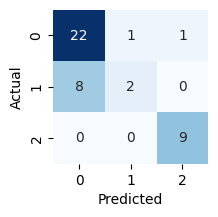

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(2, 2))

# Graficar el heatmap de la matriz de confusión
sns.heatmap(confusion_matrix(y_test,y_pred), 
            annot=True, #Para mostrar valores
            cbar=False, #Ocultamos la leyenda de los colores
            cmap="Blues")

# Configurar etiquetas de los ejes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Mostrar el gráfico
plt.show()

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.73      0.92      0.81        24\n           1       0.67      0.20      0.31        10\n           2       0.90      1.00      0.95         9\n\n    accuracy                           0.77        43\n   macro avg       0.77      0.71      0.69        43\nweighted avg       0.75      0.77      0.72        43\n'

Para verlo más bonito

In [ ]:
from tabulate import tabulate

# Obtener el informe de clasificación
report = classification_report(y_test, y_pred)

# Convertir el informe en una lista de filas
report_data = []
lines = report.split('\n')
for line in lines[2:-3]:
    row = line.split()
    report_data.append(row)

# Imprimir el informe de clasificación con formato de tabla
table = tabulate(report_data, headers=['', 'precision', 'recall', 'f1-score', 'support'], tablefmt='fancy_grid')
print(table)


╒══════════╤═════════════╤══════════╤════════════╤═══════════╕
│          │   precision │   recall │   f1-score │   support │
╞══════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0        │        0.73 │     0.92 │       0.81 │        24 │
├──────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1        │        0.67 │     0.2  │       0.31 │        10 │
├──────────┼─────────────┼──────────┼────────────┼───────────┤
│ 2        │        0.9  │     1    │       0.95 │         9 │
├──────────┼─────────────┼──────────┼────────────┼───────────┤
│          │             │          │            │           │
├──────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy │        0.77 │    43    │            │           │
╘══════════╧═════════════╧══════════╧════════════╧═══════════╛
